# Project 2
## Webscraping Barnes and Noble
### Olivia O'Mahoney

In [168]:
# Imports
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
url_genre_mapping = {
    'https://books.toscrape.com/catalogue/category/books/classics_6/index.html': 'Classics',
    'https://books.toscrape.com/catalogue/category/books/poetry_23/index.html': 'Poetry',
    'https://books.toscrape.com/catalogue/category/books/music_14/index.html': 'Music',
    'https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html': 'Historical Fiction',
    'https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html': 'Philosophy'
}

# Function to scrape data from one page
def scrape_page(url):
    # Request page content for the page
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error: Unable to fetch data from {url}")
        return []
    
    soup = bs(response.text, 'html.parser')
    
    # List to store book details
    books = []
    
    # Extract the book details from each book
    for book in soup.find_all('article', class_='product_pod'):
        name = book.h3.a['title']
        price = book.select_one('.price_color').get_text()
        availability = book.select_one('.instock.availability').get_text(strip=True)
        
        books.append({
            'Name': name,
            'Price': price,
            'Availability': availability,
            'URL': url
        })

    # Return the books
    return books

In [170]:
# Scrape data from all URLs
all_books = []
for url in url_genre_mapping.keys():
    all_books.extend(scrape_page(url))
    time.sleep(2)  # Add a delay to avoid lagging or overriding the server

# Convert the list of books into a DataFrame
df = pd.DataFrame(all_books)

In [171]:
# Add the Genre column using the URL to Genre mapping
df['Genre'] = df['URL'].map(url_genre_mapping)

# Clean the 'Price' column by getting rid of the £ and converting to numeric values
def clean_price(price):
    # Remove any non-numeric characters (£) and extra spaces
    price = ''.join(c for c in price if c.isnumeric() or c == '.')
    return float(price) if price else 0.0  # Convert to float and fix any empty strings

df['Price'] = df['Price'].apply(clean_price)

## Question 1
#### What are the unavailable books?

In [173]:
# Check for unavailable books (if there are any)
unavailable_books = df[df['Availability'] == 'In stock']
unavailable_books_list = df[~df['Name'].isin(unavailable_books['Name'])]

# If there are unavailable books, print them, else print that all books are available
if not unavailable_books_list.empty:
    print("Unavailable Books:")
    print(unavailable_books_list[['Name', 'Availability']])
else:
    print("All books are available!")

All books are available!


## Question 2
#### What is the amount of books found on each website?

/var/folders/nr/zfr041890kdd5gv9gwj5d_cc0000gn/T/ipykernel_55746/835147927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Book Count', data=book_counts, palette='rocket_r')


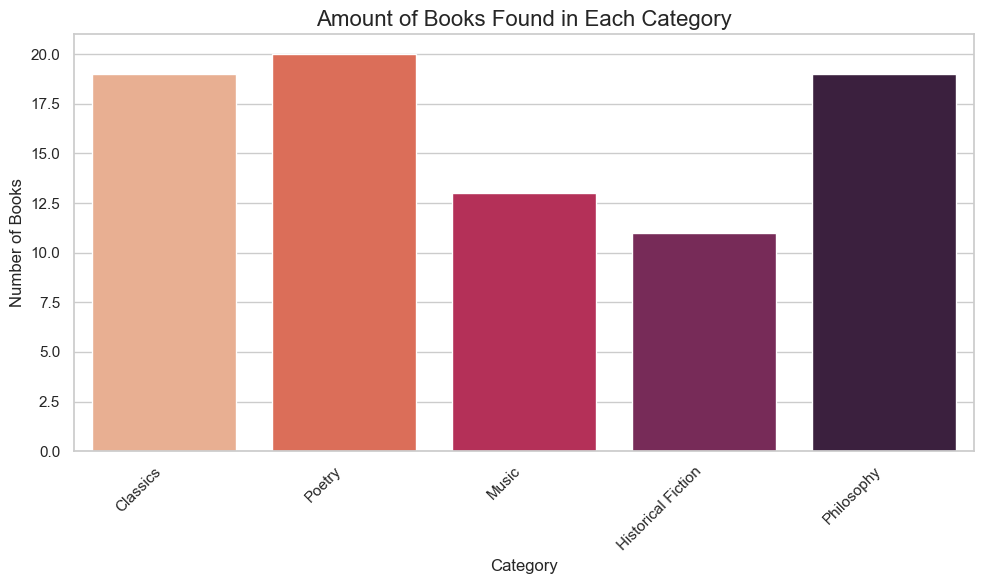

In [175]:
# Question 2: What is the amount of books found on each website?
book_counts = df.groupby('Genre')['Name'].count().reset_index(name='Book Count')

# Define the categories to show in the plot (for better readability)
category_labels = ['Classics', 'Poetry', 'Music', 'Historical Fiction', 'Philosophy']

# Plotting the amount of books found on each website (Category)
plt.figure(figsize=(10,6))
sns.barplot(x='Genre', y='Book Count', data=book_counts, palette='rocket_r')
plt.title("Amount of Books Found in Each Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)

# Change x-tick labels to the category names (replace the genre names with custom category labels)
plt.xticks(ticks=range(len(category_labels)), labels=category_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Question 3
#### What are the price ?

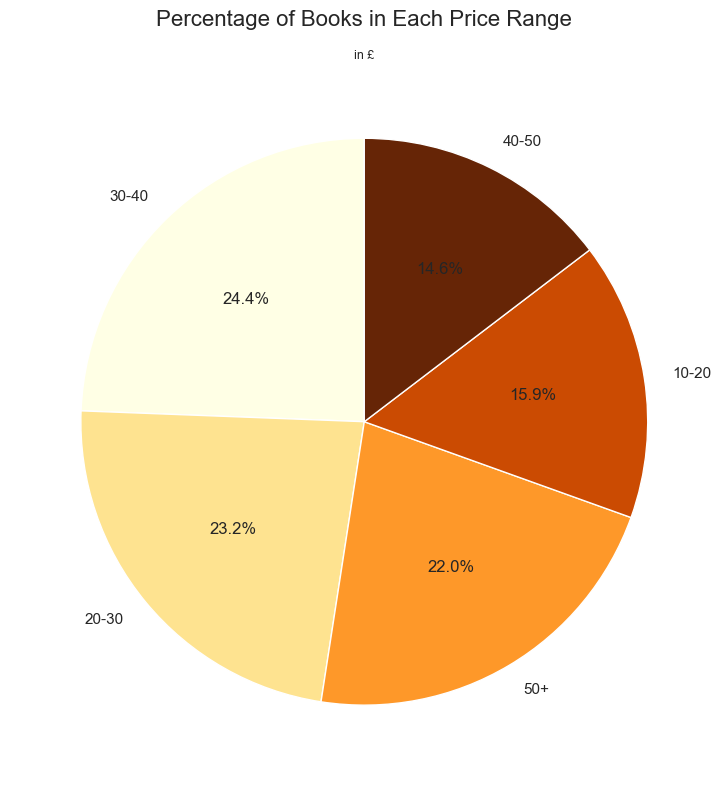

In [177]:
# Create the price ranges and labels for each of the price ranges I made
price_ranges = [10, 20, 30, 40, 50, 60]
price_labels = ['10-20', '20-30', '30-40', '40-50', '50+']
df['Price Range'] = pd.cut(df['Price'], bins=price_ranges, labels=price_labels, right=False)

# Plotting the percentage of each price range
price_range_counts = df['Price Range'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,8))
price_range_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='YlOrBr', legend=False)
plt.title("in £", size = 9)
plt.suptitle("Percentage of Books in Each Price Range", fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

## Question 4
#### Which website had the most books?

In [192]:
most_books_genre = book_counts.loc[book_counts['Book Count'].idxmax()]
print(f"Genre with the most books: \n{most_books_genre['Genre']} has {most_books_genre['Book Count']} books!")

Genre with the most books: 
Historical Fiction has 20 books!
